In [50]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('train.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [53]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


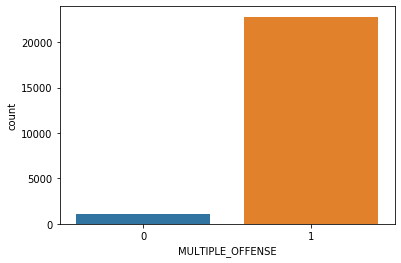

In [54]:
sns.countplot(data=df, x='MULTIPLE_OFFENSE')

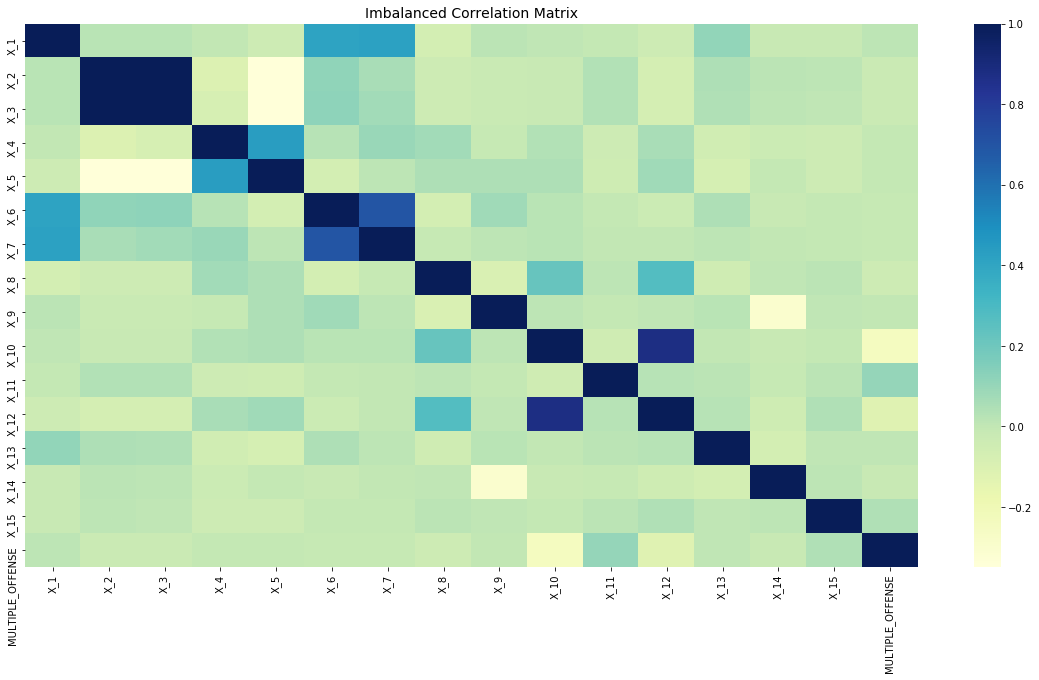

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [56]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [57]:
df.drop('INCIDENT_ID', axis=1,inplace=True)

In [58]:
df.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [84]:
li =  df['DATE'].str.split('-')

In [85]:
Month={'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09','OCT':'10',
       'NOV':'11','DEC':'12'}

In [86]:
j=0
for i in li:
    t = Month[i[1]]
    li[j][1]=t
    j=j+1

In [87]:
type(li)

pandas.core.series.Series

In [88]:
li=li.to_list()
type(li)

In [89]:
df_Date = pd.DataFrame(li,columns=['Day','Month','Year'])

In [91]:
df_Date.head()

,Day,Month,Year
0,04,07,04
1,18,07,17
2,15,03,17
3,13,02,09
4,13,04,05


In [93]:
type(df),type(df_Date)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [95]:
df['Day']=df_Date['Day']
df['Month']=df_Date['Month']
df['Year']=df_Date['Year']

In [98]:
df.drop('DATE', axis=1,inplace=True)

In [99]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Day,Month,Year
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,04,07,04
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,07,17
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,03,17
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,02,09
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,04,05


In [104]:
df[df.isna()==True].count()

X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
Day                 0
Month               0
Year                0
dtype: int64

In [105]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE()

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('MULTIPLE_OFFENSE', axis=1), df['MULTIPLE_OFFENSE'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').